In [1]:
import os
import re
import csv
import numpy as np


In [2]:
cwd = os.getcwd()

# preapre CSV

In [3]:
# benchmark_path = "/Users/u7826985/Projects/Nvidia/results/composite_hadamard_optimization"
AA_folder ="100taxa_diff_trees_1M_sites_AA"
DNA_folder ="100taxa_diff_trees_1M_sites"

In [4]:
results_path = "/Users/u7826985/Projects/Nvidia/results/2025_10_09_thomas_suggestion_build_tip_likelihood"
output_csv = f"{results_path}/results.csv"
output_csv_aa = f"{results_path}/results_aa.csv"

In [5]:
# Regex to capture the RESULT line
pattern = re.compile(
    r"\[RESULT\]\s*backend=(\w+)\s+taxa=(\d+)\s+sites=(\d+)\s+patterns=(\d+)\s+time=([\d\.e\+\-]+)s\s+likelihood=([\-.\deE]+)"
)


In [6]:
data = []

In [7]:
#read files in results_path

def read_files_in_directory(directory, unique_name=""):
    for i in range(1, 11):
        tree_folder = f"{directory}/tree_{i}"
        files = os.listdir(tree_folder)
        for file in files:
            if file.endswith('.txt'):
                print(f"Reading file: {file}")
                with open(f'{tree_folder}/{file}', 'r') as f:
                    #get treefile name from the txt file name
                    tree_file_name = file.split("_")[3] + "_" + file.split("_")[4]
                    # detect file name contains "a100"
                    a100 = False
                    transposed = False
                    if "a100" in file:
                        a100 = True
    
                
                    if "transpose" in file:
                        transposed = True
                        
                        
                    for line in f:
                        match = pattern.search(line)
                        if match:
                            backend, taxa, sites, patterns, time, likelihood = match.groups()
                            if a100:
                                continue
                                backend += "_A100"
                            # else:
                            #     backend += "_V100"
                            if transposed:
                                continue
                                # backend += "_transposed"
                                
                            if taxa != "100":
                                continue
                            backend += unique_name
                            data.append([backend, taxa, sites, patterns, likelihood, time, tree_file_name])
    
                            # Write to CSV
                            # with open(output_csv, 'w', newline='') as csvfile:
                            #     writer = csv.writer(csvfile)
                            #     writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time"])
                            #     writer.writerows(data)

    print(f"Extracted {len(data)} results to {output_csv}")



In [8]:
# read_files_in_directory(f"{benchmark_path}/{AA_folder}", unique_name="_BENCHMARK")
read_files_in_directory(f"{results_path}/{AA_folder}", unique_name="_GPU")

Reading file: output_run_ci_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_run_ci_tree_2_1000000_aa_openacc_v100.txt
Reading file: output_run_ci_tree_3_1000000_aa_openacc_v100.txt
Reading file: output_run_ci_tree_4_1000000_aa_openacc_v100.txt
Reading file: output_run_ci_tree_5_1000000_aa_openacc_v100.txt
Reading file: output_run_ci_tree_6_1000000_aa_openacc_v100.txt
Reading file: output_run_ci_tree_7_1000000_aa_openacc_v100.txt
Reading file: output_run_ci_tree_8_1000000_aa_openacc_v100.txt
Reading file: output_run_ci_tree_9_1000000_aa_openacc_v100.txt
Reading file: output_run_ci_tree_10_1000000_aa_openacc_v100.txt
Extracted 10 results to /Users/u7826985/Projects/Nvidia/results/2025_10_09_thomas_suggestion_build_tip_likelihood/results.csv


In [9]:
print(data)

[['OPENACC_GPU', '100', '1000000', '1000000', '-110413195.778517276048660', '1.364805465000000', 'tree_1'], ['OPENACC_GPU', '100', '1000000', '1000000', '-99186349.700422123074532', '1.234501114000000', 'tree_2'], ['OPENACC_GPU', '100', '1000000', '1000000', '-112041381.325586110353470', '1.220405578000000', 'tree_3'], ['OPENACC_GPU', '100', '1000000', '1000000', '-97277284.227406084537506', '1.283624810000000', 'tree_4'], ['OPENACC_GPU', '100', '1000000', '1000000', '-109757143.329428479075432', '1.193925882000000', 'tree_5'], ['OPENACC_GPU', '100', '1000000', '1000000', '-102915332.041291579604149', '1.250573958000000', 'tree_6'], ['OPENACC_GPU', '100', '1000000', '1000000', '-104636698.409147098660469', '1.222270529000000', 'tree_7'], ['OPENACC_GPU', '100', '1000000', '1000000', '-106825444.951877132058144', '1.217316272000000', 'tree_8'], ['OPENACC_GPU', '100', '1000000', '1000000', '-95332589.209261104464531', '1.185020505000000', 'tree_9'], ['OPENACC_GPU', '100', '1000000', '1000

In [10]:
alignment_pattern = re.compile(r"Alignment has (\d+) sequences with (\d+) columns, (\d+) distinct patterns")
likelihood_pattern = re.compile(r"Initial log-likelihood:\s+([-0-9.]+).*?took ([0-9.]+) wall-clock sec")

# Data list
# data = []


In [11]:
# add iqtree results
iqtree_results_path = results_path

def read_iqtree_results(directory):
    for i in range(1, 11):
        tree_folder = f"{directory}/tree_{i}"
        files = os.listdir(tree_folder)
        for file in files:
            if file.endswith('iqtree.log'):
                print(f"Reading IQ-TREE file: {file}")
                with open(f'{tree_folder}/{file}', 'r') as f:
                    tree_file_name = file.split("_")[3] + "_" + file.split("_")[4]
                    content = f.read()
            
                    # Extract alignment info
                    aln_match = alignment_pattern.search(content)
                    ll_match = likelihood_pattern.search(content)
                    
                    if aln_match and ll_match:
                        taxa = int(aln_match.group(1))
                        sites = int(aln_match.group(2))
                        patterns = int(aln_match.group(3))
                        likelihood = float(ll_match.group(1))
                        time = float(ll_match.group(2))
                        
                        data.append(["IQ-TREE_CPU", taxa, sites, patterns, likelihood, time, tree_file_name])



    print(f"Extracted {len(data)} IQ-TREE results to {output_csv}")

In [12]:
read_iqtree_results(f"/Users/u7826985/Projects/Nvidia/results/iqtree_kernel_nonreverse/{AA_folder}")

Reading IQ-TREE file: output_kernel_nonrev_tree_1_1000000_aa_iqtree.log
Reading IQ-TREE file: output_kernel_nonrev_tree_2_1000000_aa_iqtree.log
Reading IQ-TREE file: output_kernel_nonrev_tree_3_1000000_aa_iqtree.log
Reading IQ-TREE file: output_kernel_nonrev_tree_4_1000000_aa_iqtree.log
Reading IQ-TREE file: output_kernel_nonrev_tree_5_1000000_aa_iqtree.log
Reading IQ-TREE file: output_kernel_nonrev_tree_6_1000000_aa_iqtree.log
Reading IQ-TREE file: output_kernel_nonrev_tree_7_1000000_aa_iqtree.log
Reading IQ-TREE file: output_kernel_nonrev_tree_8_1000000_aa_iqtree.log
Reading IQ-TREE file: output_kernel_nonrev_tree_9_1000000_aa_iqtree.log
Reading IQ-TREE file: output_kernel_nonrev_tree_10_1000000_aa_iqtree.log
Extracted 20 IQ-TREE results to /Users/u7826985/Projects/Nvidia/results/2025_10_09_thomas_suggestion_build_tip_likelihood/results.csv


In [13]:
print(data)

[['OPENACC_GPU', '100', '1000000', '1000000', '-110413195.778517276048660', '1.364805465000000', 'tree_1'], ['OPENACC_GPU', '100', '1000000', '1000000', '-99186349.700422123074532', '1.234501114000000', 'tree_2'], ['OPENACC_GPU', '100', '1000000', '1000000', '-112041381.325586110353470', '1.220405578000000', 'tree_3'], ['OPENACC_GPU', '100', '1000000', '1000000', '-97277284.227406084537506', '1.283624810000000', 'tree_4'], ['OPENACC_GPU', '100', '1000000', '1000000', '-109757143.329428479075432', '1.193925882000000', 'tree_5'], ['OPENACC_GPU', '100', '1000000', '1000000', '-102915332.041291579604149', '1.250573958000000', 'tree_6'], ['OPENACC_GPU', '100', '1000000', '1000000', '-104636698.409147098660469', '1.222270529000000', 'tree_7'], ['OPENACC_GPU', '100', '1000000', '1000000', '-106825444.951877132058144', '1.217316272000000', 'tree_8'], ['OPENACC_GPU', '100', '1000000', '1000000', '-95332589.209261104464531', '1.185020505000000', 'tree_9'], ['OPENACC_GPU', '100', '1000000', '1000

In [14]:
# Write to CSV

def write_to_csv(data, output_csv):
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time","treefile"])
        writer.writerows(data)
        
        
write_to_csv(data, output_csv)

# Analysis of Results

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
# Read the CSV file into a DataFrame
df = pd.read_csv(output_csv)
# Display the first few rows of the DataFrame
df.head()

,backend,taxa,sites,patterns,likelihood,time,treefile
0,OPENACC_GPU,100,1000000,1000000,-1.104132e+08,1.364805,tree_1
1,OPENACC_GPU,100,1000000,1000000,-9.918635e+07,1.234501,tree_2
2,OPENACC_GPU,100,1000000,1000000,-1.120414e+08,1.220406,tree_3
3,OPENACC_GPU,100,1000000,1000000,-9.727728e+07,1.283625,tree_4
4,OPENACC_GPU,100,1000000,1000000,-1.097571e+08,1.193926,tree_5


In [17]:
df

,backend,taxa,sites,patterns,likelihood,time,treefile
0,OPENACC_GPU,100,1000000,1000000,-1.104132e+08,1.364805,tree_1
1,OPENACC_GPU,100,1000000,1000000,-9.918635e+07,1.234501,tree_2
2,OPENACC_GPU,100,1000000,1000000,-1.120414e+08,1.220406,tree_3
3,OPENACC_GPU,100,1000000,1000000,-9.727728e+07,1.283625,tree_4
4,OPENACC_GPU,100,1000000,1000000,-1.097571e+08,1.193926,tree_5
5,OPENACC_GPU,100,1000000,1000000,-1.029153e+08,1.250574,tree_6
6,OPENACC_GPU,100,1000000,1000000,-1.046367e+08,1.222271,tree_7
7,OPENACC_GPU,100,1000000,1000000,-1.068254e+08,1.217316,tree_8
8,OPENACC_GPU,100,1000000,1000000,-9.533259e+07,1.185021,tree_9
9,OPENACC_GPU,100,1000000,1000000,-1.065590e+08,1.177349,tree_10


In [18]:
groups = df.groupby('treefile')


In [19]:
def _basename(s):
    return os.path.basename(str(s))

def prepare(df):
    out = df.copy()
    # standardize column names if needed
    cols = {c.lower(): c for c in df.columns}
    # Expect columns named like 'tree_file', 'backend', 'time'
    # If user had different casing, map it:
    def find(colname):
        return next((c for c in df.columns if c.lower() == colname), colname)
    tree_col = find('treefile')
    backend_col = find('backend')
    time_col = find('time')

    out['treefile'] = out[tree_col].astype(str)
    out['backend']   = out[backend_col].astype(str)
    out['time']      = pd.to_numeric(out[time_col], errors='coerce')

    out['tree_key']  = out['treefile']
    # Order tree keys by natural sort on any numbers inside (helps readability)
    def _nat_key(s):
        return [int(t) if t.isdigit() else t for t in re.split(r'(\d+)', s)]
    tree_order = sorted(out['tree_key'].unique(), key=_nat_key)
    out['tree_key'] = pd.Categorical(out['tree_key'], categories=tree_order, ordered=True)

    # Optional: order backends (put CPU first, then GPU variants)
    backend_order = sorted(out['backend'].unique(), key=lambda b: (('cpu' not in b.lower()), b.lower()))
    out['backend'] = pd.Categorical(out['backend'], categories=backend_order, ordered=True)
    return out

dfp = prepare(df)

# --- 1) Grouped bars: mean time per backend for each tree ---------------------
def plot_grouped_bars(dfp, logy=True, savepath=None):
    pivot = dfp.pivot_table(index='tree_key', columns='backend', values='time', aggfunc='mean')
     # Define colors based on backend
    colors = ['blue' if backend == 'IQ-TREE_CPU' else 'orange' for backend in pivot.columns]
    ax = pivot.plot(kind='bar', figsize=(10, 5), color=colors)
    ax.set_xlabel("Tree file")
    ax.set_ylabel("Runtime (s)")
    ax.set_title("runtime per tree")
    if logy:
        ax.set_yscale('log')
    # ax.legend(title="Backend")
    ax.legend(title="Backend", loc='upper center', bbox_to_anchor=(0.8, -0.16), ncol=len(pivot.columns))

    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()
    
# def plot_grouped_bars(dfp, logy=True, savepath=None):
#     pivot = dfp.pivot_table(index='tree_key', columns='backend', values='time', aggfunc='mean')
#     colors = ['blue' if backend == 'IQ-TREE_CPU' else 'orange' for backend in pivot.columns]
# 
#     ax = pivot.plot(kind='bar', figsize=(10, 5), color=colors)
# 
#     ax.set_xlabel("Tree file")
#     ax.set_ylabel("Runtime (s)")
#     ax.set_title("Runtime per tree")
# 
#     if logy:
#         ax.set_yscale('log')
# 
#     # 👇 Move legend to the right without overlapping
#     ax.legend(title="Backend", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#     
#     # 👇 Adjust layout to leave room for legend
#     plt.tight_layout(rect=[0, 0, 0.85, 1])
# 
#     if savepath:
#         plt.savefig(savepath, dpi=300, bbox_inches='tight')
# 
#     plt.show()

# --- 2) Dot plot: each run as a point (great with log scale) ------------------
def plot_dot(dfp, logy=True, savepath=None):
    fig, ax = plt.subplots(figsize=(10, 5))
    backends = list(dfp['backend'].cat.categories) if hasattr(dfp['backend'], 'cat') else sorted(dfp['backend'].unique())
    x_pos = np.arange(len(backends))

    jitter = 0.15
    for i, b in enumerate(backends):
        y = dfp.loc[dfp['backend'] == b, 'time'].values
        x = np.random.uniform(i - jitter, i + jitter, size=len(y))
        ax.scatter(x, y, s=18, alpha=0.8)  # no explicit colors
    ax.set_xticks(x_pos)
    ax.set_xticklabels(backends, rotation=0)
    ax.set_xlabel("Backend")
    ax.set_ylabel("Runtime (s)")
    ax.set_title("Per-run runtimes by backend")
    if logy:
        ax.set_yscale('log')
    ax.grid(True, which='both', axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()

# --- 3) Distribution view: boxplot by backend ---------------------------------
def plot_box(dfp, logy=True, savepath=None):
    fig, ax = plt.subplots(figsize=(10, 5))
    dfp.boxplot(column='time', by='backend', ax=ax)  # default style, no colors set
    ax.set_title("Runtime distribution by backend")
    ax.set_ylabel("Runtime (s)")
    if logy:
        ax.set_yscale('log')
    plt.suptitle("")  # remove automatic super-title
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()

# --- 4) Compact heatmap: trees x backends (mean time) -------------------------
def plot_heatmap(dfp, log=True, savepath=None):
    mat = dfp.pivot_table(index='tree_key', columns='backend', values='time', aggfunc='mean')
    data = np.log10(mat.values) if log else mat.values

    fig, ax = plt.subplots(figsize=(10, max(4, 0.4*len(mat))))
    im = ax.imshow(data, aspect='auto')  # default colormap, no color specified

    # ticks / labels
    ax.set_yticks(np.arange(mat.shape[0]))
    ax.set_yticklabels(mat.index.astype(str))
    ax.set_xticks(np.arange(mat.shape[1]))
    ax.set_xticklabels(mat.columns.astype(str), rotation=45, ha='right')
    ax.set_xlabel('Backend')
    ax.set_ylabel('Tree file')
    ax.set_title('Mean runtime heatmap (log10 seconds)' if log else 'Mean runtime heatmap (seconds)')
    fig.colorbar(im, ax=ax, label=('log10(s)' if log else 's'))
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')
    plt.show()

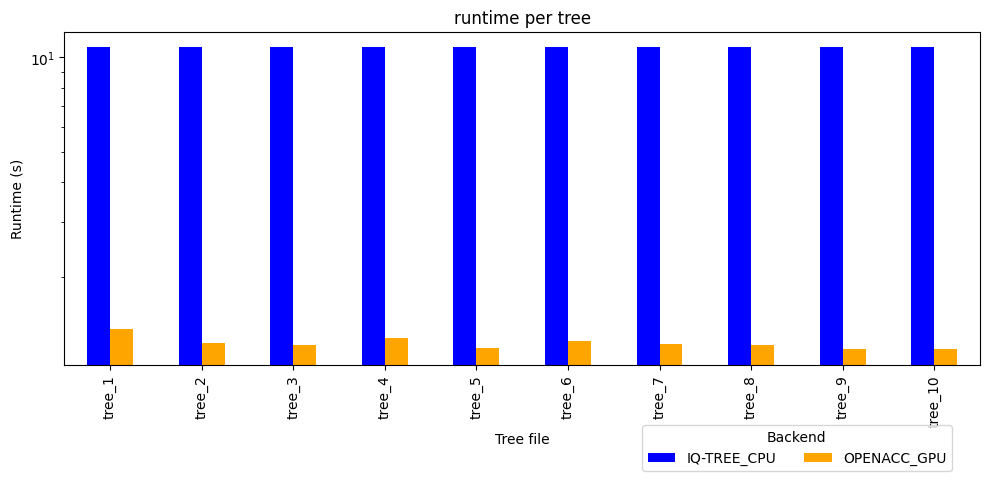

In [20]:
plot_grouped_bars(dfp, logy=True, savepath=f"{cwd}/AA_100taxa_benchmark_buildtip_likelihood.png")

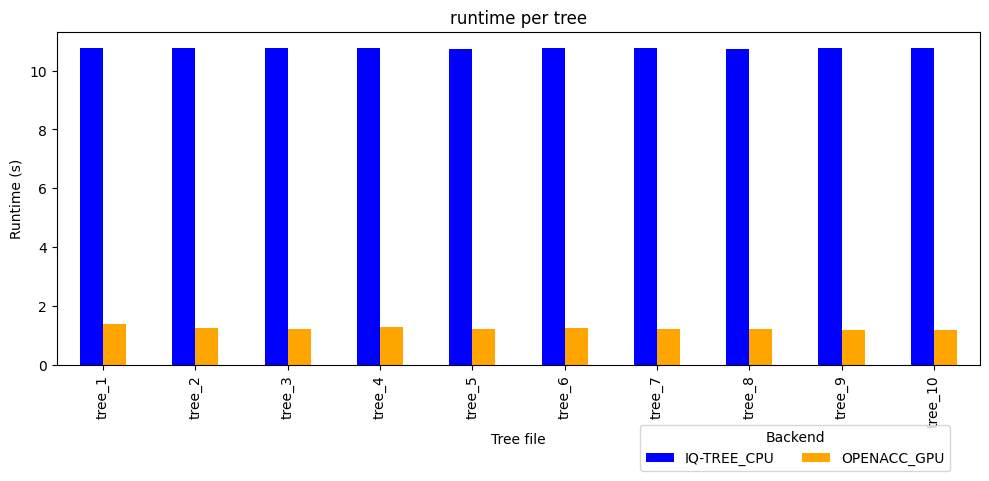

In [21]:
plot_grouped_bars(dfp, logy=False, savepath=f"{cwd}/AA_100taxa_benchmark_buildtip_likelihood_liner.png")


In [22]:
data = []

# read_files_in_directory(f"{benchmark_path}/{DNA_folder}", unique_name="_BENCHMARK")
read_files_in_directory(f"{results_path}/{DNA_folder}",unique_name="_GPU")


data

Reading file: output_run_ci_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_run_ci_tree_2_1000000_dna_openacc_v100.txt
Reading file: output_run_ci_tree_3_1000000_dna_openacc_v100.txt
Reading file: output_run_ci_tree_4_1000000_dna_openacc_v100.txt
Reading file: output_run_ci_tree_5_1000000_dna_openacc_v100.txt
Reading file: output_run_ci_tree_6_1000000_dna_openacc_v100.txt
Reading file: output_run_ci_tree_7_1000000_dna_openacc_v100.txt
Reading file: output_run_ci_tree_8_1000000_dna_openacc_v100.txt
Reading file: output_run_ci_tree_9_1000000_dna_openacc_v100.txt
Reading file: output_run_ci_tree_10_1000000_dna_openacc_v100.txt
Extracted 10 results to /Users/u7826985/Projects/Nvidia/results/2025_10_09_thomas_suggestion_build_tip_likelihood/results.csv


[['OPENACC_GPU',
  '100',
  '1000000',
  '1000000',
  '-70051678.096398830413818',
  '1.142614026000000',
  'tree_1'],
 ['OPENACC_GPU',
  '100',
  '1000000',
  '1000000',
  '-62357359.211786955595016',
  '1.062411702000000',
  'tree_2'],
 ['OPENACC_GPU',
  '100',
  '1000000',
  '1000000',
  '-68988749.108756780624390',
  '1.068996854000000',
  'tree_3'],
 ['OPENACC_GPU',
  '100',
  '1000000',
  '1000000',
  '-66676166.743556618690491',
  '1.125886425000000',
  'tree_4'],
 ['OPENACC_GPU',
  '100',
  '1000000',
  '1000000',
  '-66178676.785272315144539',
  '1.062313254000000',
  'tree_5'],
 ['OPENACC_GPU',
  '100',
  '1000000',
  '1000000',
  '-63964654.266846217215061',
  '1.121429075000000',
  'tree_6'],
 ['OPENACC_GPU',
  '100',
  '1000000',
  '1000000',
  '-68711425.513360381126404',
  '1.018004903000000',
  'tree_7'],
 ['OPENACC_GPU',
  '100',
  '1000000',
  '1000000',
  '-65497999.130890302360058',
  '1.051579499000000',
  'tree_8'],
 ['OPENACC_GPU',
  '100',
  '1000000',
  '100000

In [23]:
read_iqtree_results(f"/Users/u7826985/Projects/Nvidia/results/iqtree_kernel_nonreverse/{DNA_folder}")

Reading IQ-TREE file: output_kernel_nonrev_tree_1_1000000_iqtree.log
Reading IQ-TREE file: output_kernel_nonrev_tree_2_1000000_iqtree.log
Reading IQ-TREE file: output_kernel_nonrev_tree_3_1000000_iqtree.log
Reading IQ-TREE file: output_kernel_nonrev_tree_4_1000000_iqtree.log
Reading IQ-TREE file: output_kernel_nonrev_tree_5_1000000_iqtree.log
Reading IQ-TREE file: output_kernel_nonrev_tree_6_1000000_iqtree.log
Reading IQ-TREE file: output_kernel_nonrev_tree_7_1000000_iqtree.log
Reading IQ-TREE file: output_kernel_nonrev_tree_8_1000000_iqtree.log
Reading IQ-TREE file: output_kernel_nonrev_tree_9_1000000_iqtree.log
Reading IQ-TREE file: output_kernel_nonrev_tree_10_1000000_iqtree.log
Extracted 20 IQ-TREE results to /Users/u7826985/Projects/Nvidia/results/2025_10_09_thomas_suggestion_build_tip_likelihood/results.csv


In [24]:
write_to_csv(data, output_csv_aa)
df_aa = pd.read_csv(output_csv_aa)

dfp_aa = prepare(df_aa)

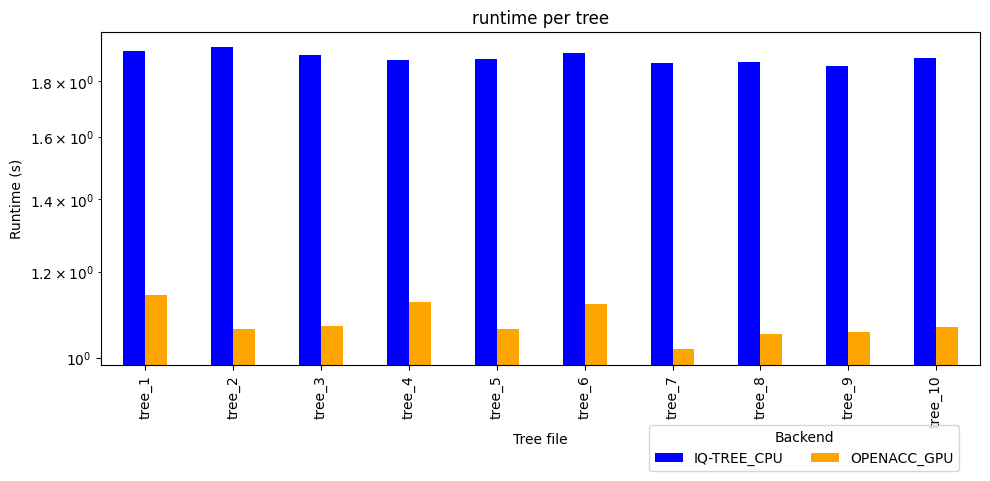

In [25]:
plot_grouped_bars(dfp_aa, logy=True, savepath=f"{cwd}/DNA_100taxa_benchmark_buildtip_likelihood.png")

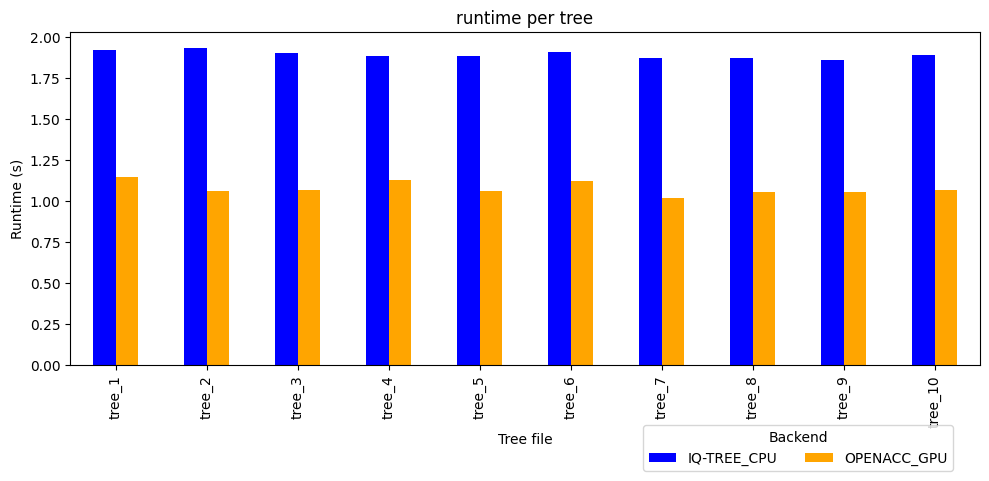

In [26]:
plot_grouped_bars(dfp_aa, logy=False, savepath=f"{cwd}/DNA_100taxa_benchmark_buildtip_likelihood.png")
